# Example No 3 : CNN model by Keras for fashion-related dataset 

# Table of Content 
- [1 - Introduction ](#intro)
    - [1.1 What is the new we will learn in this example ? ](#new_learn)
    - [1.2 The source of the data ](#data_source)
    - [1.3 The strategy followed in this model ](#strategy)
    
    - [1.4 Load the required libraries ](#import)

- [2 - Data preparation ](#preparation)

- [3- Build CNN model ](#CNN_model)
    
- [4- Train & Evaluate the model](#train_evaluate)
    - [4.1 Train (Fit) our CNN Model ](#train_model)

    - [4.2 The history of model learning on training data ](#model_history)
    - [4.3 Evaluate our CNN Model ](#evaluate_model)
- [5- Prediction ](#prediction)
    - [5.1 Model performance for each category  ](#model_performance)

    - [5.2 Visualize correct and incorrect predictions ](#correct_incorrect)

-  [ Further TensorFlow (Keras) Applications for CNN ](#other_apps)

-  [ Key Resources Utilized in Crafting This Notebook](#resources)

<a name="intro"></a>
## 1 - Introduction

<a name="new_learn"></a>
### 1.1 What is the new we will learn in this example ?
We will build a CNN using Keras for the purpose of classifying a more challenging dataset for image classification tasks due to its diverse set of fashion-related items. 

<a name="data_source"></a>
### 1.2 The source of the data 
The original code of this example and the data from Kaggle and you can download; [CNN with Keras](https://www.kaggle.com/bugraokcu/cnn-with-keras). 

<a name="strategy"></a>
### 1.3 The strategy followed in this model 
* Our strategy will be using 20% of the train data (12000 data rows) as a validation set to optimize the classifier, while keeping test data to finally evaluate the accuracy of the model on the data it has never seen.
* Since he was not sure if the data was already shuffled, he didn't pass `validation_split=0.2` to _fit()_ and instead explicitly shuffled and split the validation data, as `validation_split` [would](https://keras.io/getting-started/faq/#how-is-the-validation-split-computed) use last 20% of the data in that case.

<a name="import"></a>
### 1.4 Load the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

<a name="preparation"></a>
## 2 - Data preparation 

In [2]:
data_train = pd.read_csv('Fashion_MNIST/fashion-mnist_train.csv')
data_test = pd.read_csv('Fashion_MNIST/fashion-mnist_test.csv')

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

<a name="CNN_model"></a>
## 3 - Build CNN model 

In [3]:
batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

<a name="train_evaluate"></a>
## 4- Train & Evaluate the model

<a name="train_model"></a>
### 4.1 Train (Fit) our CNN Model

In [5]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/50
188/188 [==============================] - 17s 85ms/step - loss: 0.8339 - accuracy: 0.6865 - val_loss: 0.5144 - val_accuracy: 0.8112
Epoch 2/50
188/188 [==============================] - 15s 77ms/step - loss: 0.5180 - accuracy: 0.8069 - val_loss: 0.4286 - val_accuracy: 0.8455
Epoch 3/50
188/188 [==============================] - 14s 77ms/step - loss: 0.4470 - accuracy: 0.8361 - val_loss: 0.3657 - val_accuracy: 0.8679
Epoch 4/50
188/188 [==============================] - 16s 88ms/step - loss: 0.3994 - accuracy: 0.8564 - val_loss: 0.3297 - val_accuracy: 0.8844
Epoch 5/50
188/188 [==============================] - 15s 78ms/step - loss: 0.3660 - accuracy: 0.8662 - val_loss: 0.3124 - val_accuracy: 0.8858
Epoch 6/50
188/188 [==============================] - 15s 77ms/step - loss: 0.3440 - accuracy: 0.8754 - val_loss: 0.3092 - val_accuracy: 0.8842
Epoch 7/50
188/188 [==============================] - 16s 83ms/step - loss: 0.3291 - accuracy: 0.8811 - val_loss: 0.2834 - val_accuracy:

<a name="model_history"></a>
### 4.2 The history of model learning on training data 

* It turns out our classifier does better then the best baseline reported [here](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/), which is an SVM classifier with mean accuracy of 0.897.


In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### The Accuracy & Loss Vs Epochs for Training and Validation datasets (model performance)

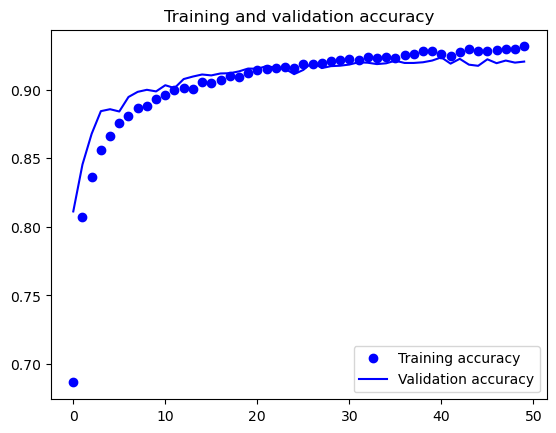

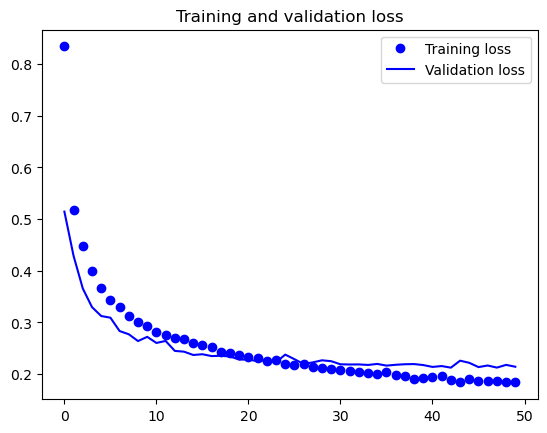

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<a name="evaluate_model"></a>
### 4.3 Evaluate our CNN Model

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('The accuracy of our model on test dataset : %.2f' % (test_acc*100))
print('The loss of our model on test dataset : %.2f' % (test_loss*100))

The accuracy of our model on test dataset : 92.91
The loss of our model on test dataset : 19.40


<a name="prediction"></a>
## 5- Prediction

In [9]:
#get the predictions for the test data
predicted_classes = model.predict(X_test)
predicted_classes_indices = np.argmax(predicted_classes, axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
y_true = y_true.values # convert to array as it is better when deal with sklearn 
correct = np.nonzero(predicted_classes_indices==y_true)[0]
incorrect = np.nonzero(predicted_classes_indices!=y_true)[0]

313/313 [==============================] - 3s 9ms/step


<a name="model_performance"></a>
### 5.1 Model performance for each category  

In [10]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes_indices, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.89      0.88      1000
     Class 1       1.00      0.99      0.99      1000
     Class 2       0.89      0.90      0.90      1000
     Class 3       0.92      0.95      0.94      1000
     Class 4       0.90      0.88      0.89      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.80      0.77      0.78      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



* **Observation** : 
    * It's apparent that our classifier is underperformed for class 6 in terms of both precision and recall. For class 2, classifier is slightly lacking precision whereas it is slightly lacking recall (i.e. missed) for class 4.

    * Perhaps we would gain more insight after visualizing the correct and incorrect predictions.

<a name="correct_incorrect"></a>
### 5.2 Visualize correct and incorrect predictions

#### A) Correct cases for our model

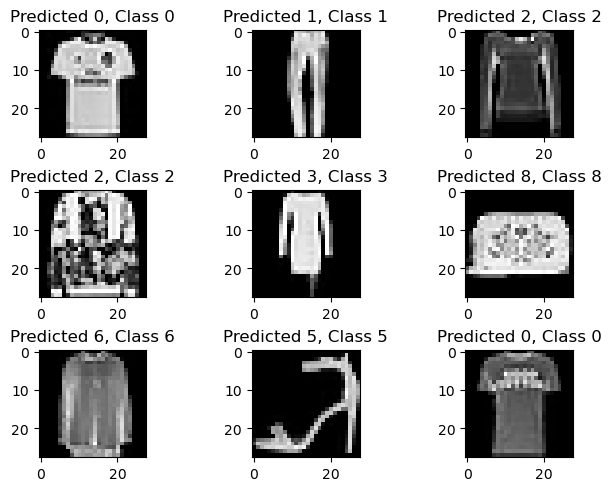

In [11]:
fig, axes = plt.subplots(3, 3, constrained_layout=True)

for i, correct in enumerate(correct[:9]):
    axes.flatten()[i].imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    axes.flatten()[i].set_title("Predicted {}, Class {}".format(predicted_classes_indices[correct], y_true[correct]))


#### B) Incorrect cases for our model

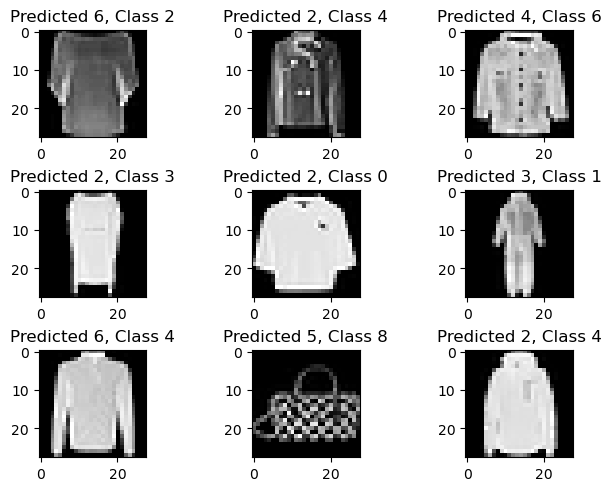

In [12]:
fig, axes = plt.subplots(3, 3, constrained_layout=True)

for i, incorrect in enumerate(incorrect[:9]):
    axes.flatten()[i].imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    axes.flatten()[i].set_title("Predicted {}, Class {}".format(predicted_classes_indices[incorrect], y_true[incorrect]))


It looks like diversity of the similar patterns present on multiple classes effect the performance of the classifier although CNN is a robust architechture. A jacket, a shirt, and a long-sleeve blouse has similar patterns: long sleeves (or not!), buttons (or not!), and so on.

&nbsp;

<a name="other_apps"></a>
## Further TensorFlow (Keras) Applications for CNN 
---------
* [The basic tools of Keras for CNN](../2_Keras_BasicTools_CNN.ipynb)
* [Example No 1](Example_No_1_images_6categories.ipynb) : 6 Categories Images Classification.

* [Example No 2](Example_No_2_mnist_dataset_acc99.ipynb) : MNIST dataset (Acc 0.997).

* [Example No 3](Example_No_3_fashion_related_dataset.ipynb) : fashion-related dataset. 

* [Example No 4](Example_No_4_cats_dogs_classification.ipynb) : Cats & Dogs Classification. 

* [Example No 5](Example_No_5_Cats_Dogs_classifer.ipynb) : Cats & Dogs classifier and compare to the DNN model. 

&nbsp;
<a name="resources"></a>
## Key Resources Utilized in Crafting This Notebook :
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>
- <a rel="the code used2" href="https://github.com/HeshamAsem/CNN"> Hesham Asem GitHub for ML tools. </a>